# Indian cities

In [0]:
data_path = "cities_r2.csv"

In [0]:
import pandas as pd
import numpy as np
data = pd.read_csv(data_path)

In [0]:
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


**top 25 populated city**

In [0]:
top_25_populated_city =  data.sort_values('population_total', ascending=False).head(25)[["name_of_city","population_total",
                                                                                 "population_male","population_female"]]

In [0]:
top_25_populated_city.set_index('name_of_city',inplace=True)

In [0]:
top_25_populated_city

,population_total,population_male,population_female
name_of_city,,,
Greater Mumbai,12478447,6736815,5741632
Delhi,11007835,5871362,5136473
Bengaluru,8425970,4401299,4024671
Greater Hyderabad,6809970,3500802,3309168
Ahmadabad,5570585,2935869,2634716
Chennai,4681087,2357633,2323454
Kolkata,4486679,2362662,2124017
Surat,4462002,2538243,1923759
Pune,3115431,1602137,1513294


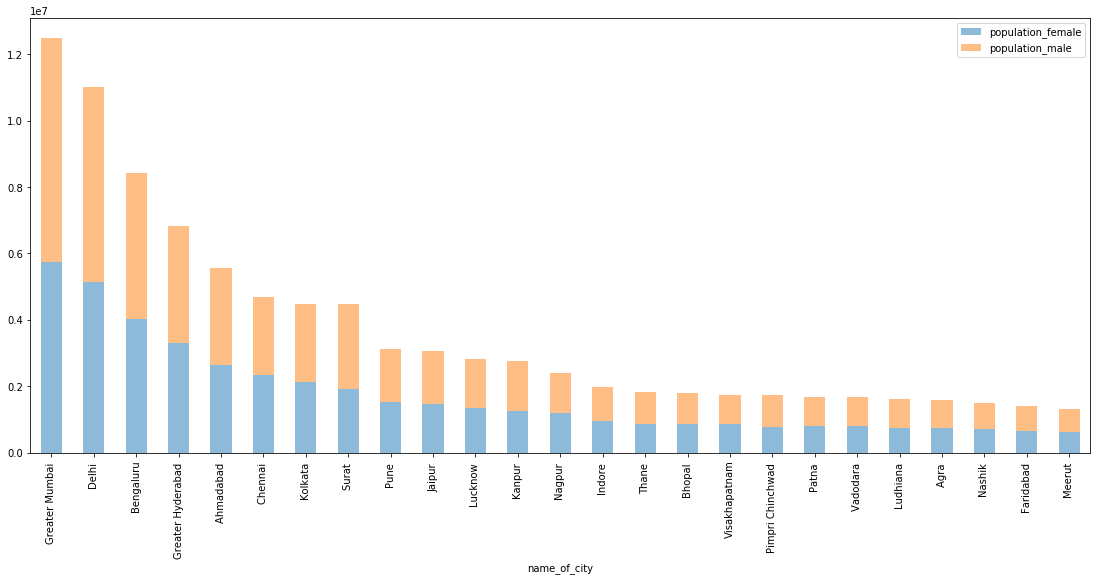

In [0]:
top_25_populated_city[['population_female','population_male']].plot(kind='bar', figsize=[19, 8], width=0.5,
                           alpha=0.5,
                           stacked = True,
                           grid=False,legend=True)

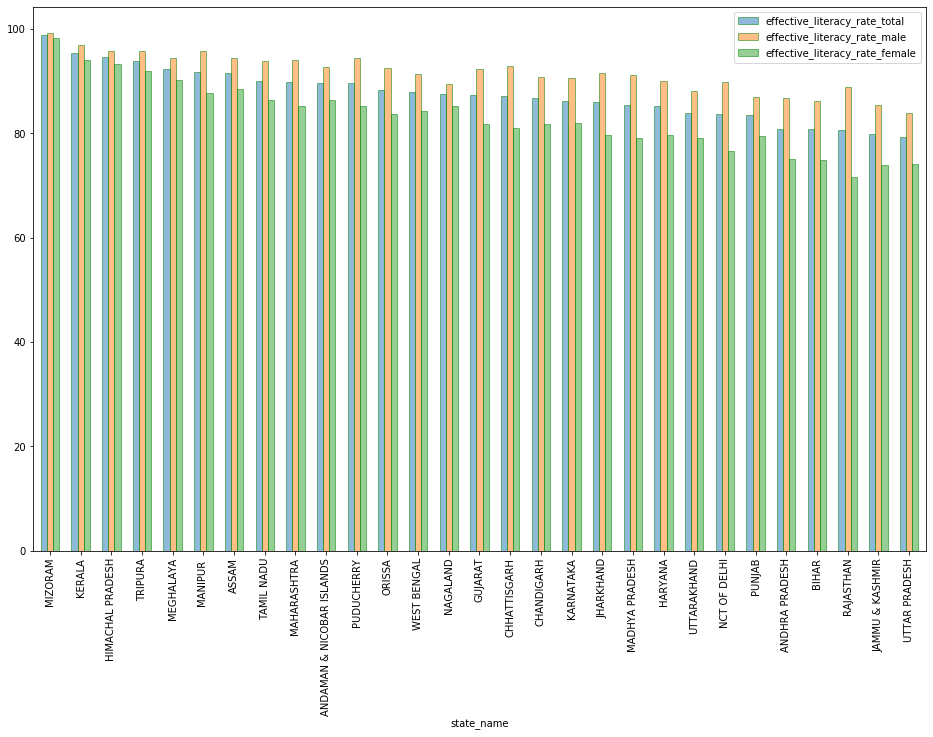

In [0]:
state_literacy_effective  = data[["state_name",
                                  "effective_literacy_rate_total",
                                  "effective_literacy_rate_male",
                                  "effective_literacy_rate_female"]].groupby("state_name").agg({"effective_literacy_rate_total":np.average,
                                                                                                "effective_literacy_rate_male":np.average,
                                                                                                "effective_literacy_rate_female":np.average}).sort_values("effective_literacy_rate_total", ascending=False)
state_literacy_effective.plot(kind="bar",
                      grid=False,
                      figsize=(16,10),
                      #color="r",
                      alpha = 0.5,
                      width=0.6,
                      stacked = False,
                     edgecolor="g",)

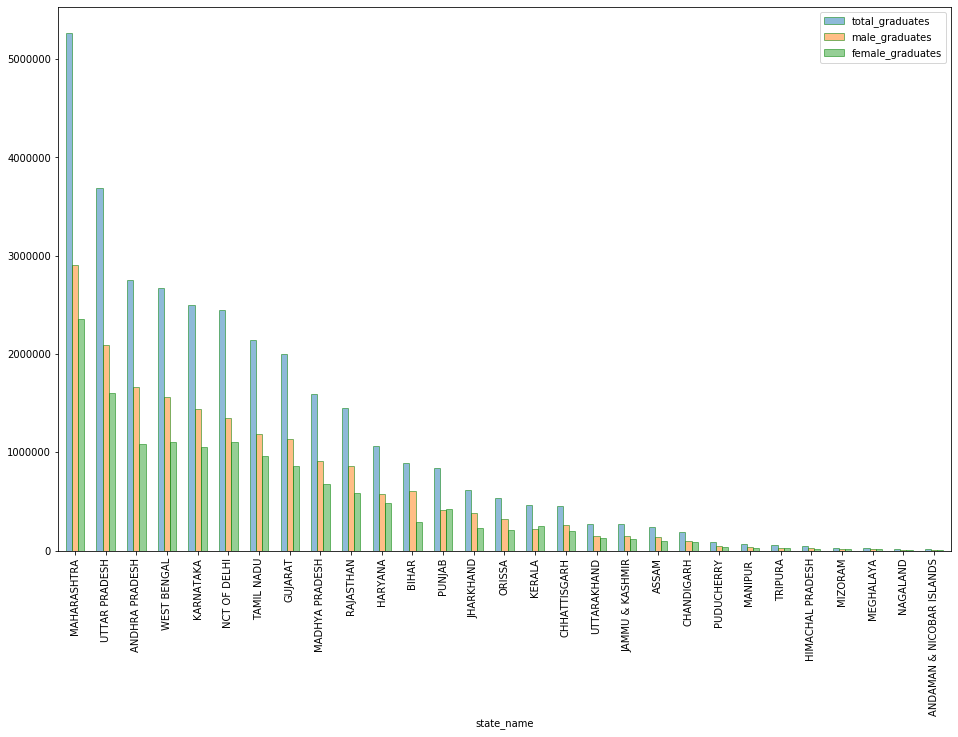

In [0]:
state_graduate  = data[["state_name",
                                  "total_graduates",
                                  "male_graduates",
                                  "female_graduates"]].groupby("state_name").agg({"total_graduates":np.sum,
                                                                                "male_graduates":np.sum,
                                                                                "female_graduates":np.sum}).sort_values("total_graduates", ascending=False)
state_graduate.plot(kind="bar",
                      grid=False,
                      figsize=(16,10),
                      #color="r",
                      alpha = 0.5,
                      width=0.6,
                      stacked = False,
                     edgecolor="g",)

In [0]:
df = data[['literates_female','state_name','population_female']].groupby(['state_name']).mean()
df.set_index='state_name'
df['literates_female_percent'] = df['literates_female']*100/df['population_female']

In [0]:
import plotly.express as px
fig = px.scatter(x=df['literates_female_percent'], y=df['population_female'])
fig.show()

In [0]:
group_by_literate_population=data[['state_name','literates_total']].groupby('state_name').sum()
group_by_literate_population.sort_values('literates_total',ascending=False,inplace=True)
group_by_literate_population.reset_index(inplace=True)
import plotly.express as px
fig = px.pie(group_by_literate_population, values='literates_total', names='state_name', title='title of graph')
fig.show()